In [11]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://github.com/dataworkshop/5dwchallenge_2019/blob/master/challenge5/input/visits.csv?raw=true'

df = pd.read_csv(path)
df.head()

,published,post_id
0,2008-01-01 18:19:00,18284
1,2008-01-01 18:30:00,18285
2,2008-01-01 18:34:00,18286
3,2008-01-02 01:32:00,18291
4,2008-01-02 14:34:00,18294


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 2 columns):
published    134137 non-null object
post_id      134137 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [4]:
df = pd.read_csv(path, parse_dates=['published'], index_col='published')
df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134137 entries, 2008-01-01 18:19:00 to 2016-10-31 23:56:00
Data columns (total 1 columns):
post_id    134137 non-null int64
dtypes: int64(1)
memory usage: 2.0 MB


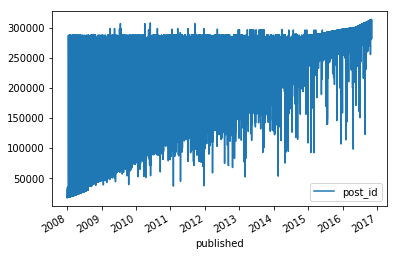

In [6]:
df.plot();

In [8]:
df.resample('1y').count()

,post_id
published,
2008-12-31,7743
2009-12-31,10783
2010-12-31,13091
2011-12-31,15063
2012-12-31,15972
2013-12-31,15537
2014-12-31,16180
2015-12-31,23452
2016-12-31,16316


In [9]:
df.resample('1m').count()

,post_id
published,
2008-01-31,435
2008-02-29,496
2008-03-31,545
2008-04-30,597
2008-05-31,635
2008-06-30,599
2008-07-31,674
2008-08-31,677
2008-09-30,914


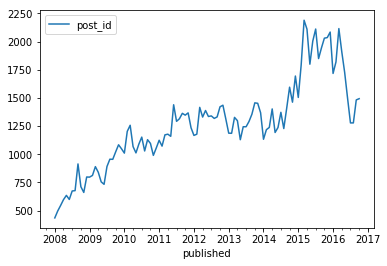

In [13]:
df.resample('1m').count().plot();

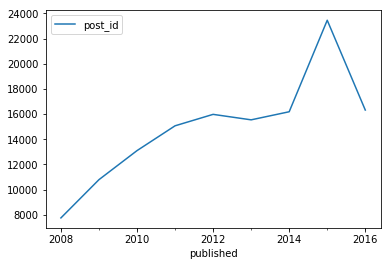

In [14]:
df.resample('1y').count().plot();

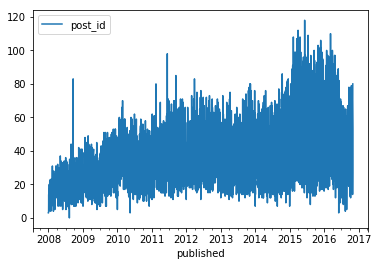

In [15]:
df.resample('1d').count().plot();

In [16]:
df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


In [17]:
df_day = df.resample('1d').count()
df_day

,post_id
published,
2008-01-01,3
2008-01-02,3
2008-01-03,4
2008-01-04,14
2008-01-05,4
2008-01-06,7
2008-01-07,17
2008-01-08,8
2008-01-09,15


In [18]:
df_day = df.resample('1d').count().reset_index()
df_day

,published,post_id
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
5,2008-01-06,7
6,2008-01-07,17
7,2008-01-08,8
8,2008-01-09,15
9,2008-01-10,20


In [19]:
df_day = df.resample('1d').count().reset_index()
df_day.columns = ['ds', 'y']
df_day

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
5,2008-01-06,7
6,2008-01-07,17
7,2008-01-08,8
8,2008-01-09,15
9,2008-01-10,20


In [20]:
num_points_to_pred = 30

train = df_day[:-num_points_to_pred]
test = df_day[-num_points_to_pred:]

In [21]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [22]:
future = m.make_future_dataframe(periods=num_points_to_pred, freq='D', include_history=False)
future

,ds
0,2016-10-02
1,2016-10-03
2,2016-10-04
3,2016-10-05
4,2016-10-06
5,2016-10-07
6,2016-10-08
7,2016-10-09
8,2016-10-10
9,2016-10-11


In [23]:
forecast = m.predict(future)

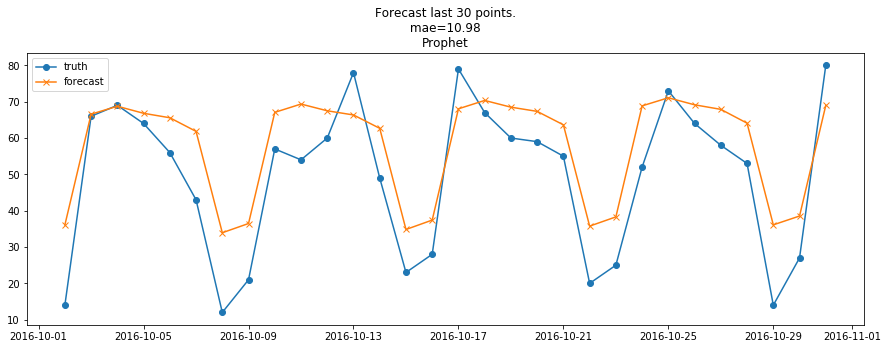

In [30]:
def plot_forecast(test, forecast):
    forecast = forecast[-num_points_to_pred:]
    score = np.round(mae(test.y, forecast.yhat), 2)
    plt.figure(figsize=(15,5))
    plt.title('Forecast last {} points.\n mae={} \nProphet'.format(num_points_to_pred, score))
    plt.plot(test.ds, test.y, 'o-', label='truth');
    plt.plot(test.ds, forecast.yhat, 'x-', label='forecast');
    plt.legend();
    
plot_forecast(test, forecast)

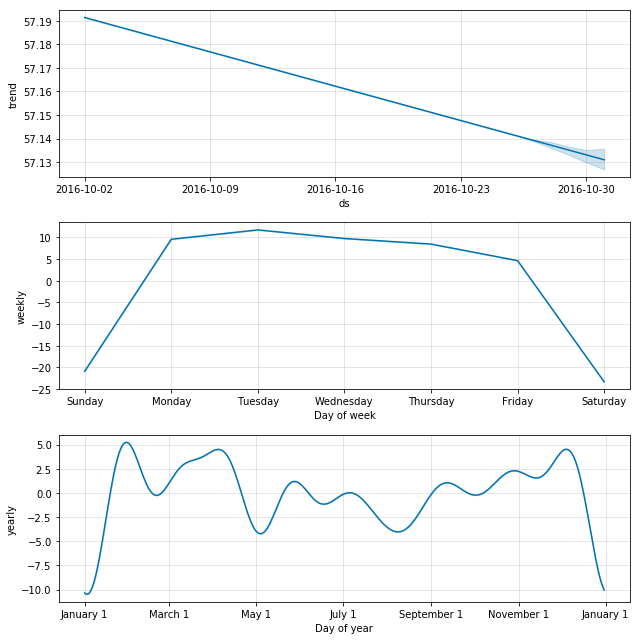

In [32]:
m.plot_components(forecast);

In [33]:
# End of part 1